We will create word embeddings and use word vectors to get analogies between words.

In [26]:
### used libraries
import nltk
from gensim.models import Word2Vec
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
import numpy as np
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import shutil
from sklearn.decomposition import PCA

First we merge 3 txt file into a single txt file called 'all_books.txt'. We will use that txt along the notebook.

In [4]:
with open('all_books.txt','wb') as wfd:
    for f in ['01 - The Fellowship Of The Ring.txt','02 - The Two Towers.txt','03 - The Return Of The King.txt']:
        with open(f,'rb') as fd:
            shutil.copyfileobj(fd, wfd)

In [5]:
## and we read the txt file
f = open('all_books.txt')
raw = f.read()

Let's have a look at the txt file we just createad! We print out first 100 characters by using print function. Since we have '\n' (newline character) in txt file it will look more beatufiul.

In [13]:
print(raw[:100])

Three Rings for the Elven-kings under the sky,
               Seven for the Dwarf-lords in their hal


These lines may remind some of you the monologue at the beginning of "the Fellowship of the Ring", let's print out entire of it.

In [14]:
print(raw[:475])

Three Rings for the Elven-kings under the sky,
               Seven for the Dwarf-lords in their halls of stone,
            Nine for Mortal Men doomed to die,
              One for the Dark Lord on his dark throne
           In the Land of Mordor where the Shadows lie.
               One Ring to rule them all, One Ring to find them,
               One Ring to bring them all and in the darkness bind them
           In the Land of Mordor where the Shadows lie.
           


If we print out without print function we will see newline character in our txt file we need to remove it to process text.

In [15]:
raw[:100]

'Three Rings for the Elven-kings under the sky,\n               Seven for the Dwarf-lords in their hal'

We remove newline character by using replace function

In [16]:
raw = raw.replace('\n','')
raw[:100]

'Three Rings for the Elven-kings under the sky,               Seven for the Dwarf-lords in their hall'

As you can see we have whitespaces in our txt file so we remove them 

In [20]:
raw = " ".join(raw.split())
raw[:100]

'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, Ni'

Let's have a look at the entire of it again. Since we removed '\n' from our txt file it will appear side by side.

In [25]:
print(raw[:218])

Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, Nine for Mortal Men doomed to die, One for the Dark Lord on his dark throne In the Land of Mordor where the Shadows lie.


Let's start processing our txt file. First we will tokenize it into sentences and we will use sent_tokenize module of nltk library. It will seperate our txt into sentences by using dot as seperator. It's default language is 'English'.

In [27]:
sentences = sent_tokenize(raw)

Let's have a look at top 2 sentences.

In [28]:
sentences[:2]

['Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, Nine for Mortal Men doomed to die, One for the Dark Lord on his dark throne In the Land of Mordor where the Shadows lie.',
 'One Ring to rule them all, One Ring to find them, One Ring to bring them all and in the darkness bind them In the Land of Mordor where the Shadows lie.']

We may seperate our sentences into words by using word_tokenize module of nltk library. The result will be a list of list and word[0] represents the first sentence in txt file.

In [33]:
words = [word_tokenize(sentence) for sentence in sentences]
print(words[0])

['Three', 'Rings', 'for', 'the', 'Elven-kings', 'under', 'the', 'sky', ',', 'Seven', 'for', 'the', 'Dwarf-lords', 'in', 'their', 'halls', 'of', 'stone', ',', 'Nine', 'for', 'Mortal', 'Men', 'doomed', 'to', 'die', ',', 'One', 'for', 'the', 'Dark', 'Lord', 'on', 'his', 'dark', 'throne', 'In', 'the', 'Land', 'of', 'Mordor', 'where', 'the', 'Shadows', 'lie', '.']


If you want to remove stopwords and punctuations you can create a list and then use that list to remove unwanted words or punctuations. Here i used nltk's stopwords and punctuations from string library.

In [37]:
stop = set(stopwords.words('english') + list(string.punctuation))
print(stop)

{'himself', '~', 'while', 'and', 'for', 'those', 'if', 'him', 've', '"', 'itself', 'were', '^', 'of', 'here', "it's", 'hers', 'did', 'does', 'why', 'no', "that'll", 'that', 'now', '\\', 'under', 'as', 'ma', ')', 'do', 'having', 's', 'not', 'its', 'during', 'this', 'off', '>', 't', ',', 'has', 'about', 'against', 'be', 'our', 'by', 'don', 'couldn', '/', 'doing', 'because', 'yourselves', '+', 'a', 'been', 'aren', 'over', 'themselves', 'until', 'more', 'only', 'how', 'd', '?', "shan't", 'your', 'into', 'to', "won't", 'hasn', 'or', 'few', 'any', 'herself', 'should', "wasn't", 'yourself', 'but', 'ourselves', 'these', "you'll", 'theirs', 'down', 'up', 'm', 'i', 'ours', 'between', 'with', "needn't", '`', 'such', "aren't", "haven't", 'so', "don't", 'before', 'we', "mustn't", '=', 'his', 'out', '.', 'there', 'ain', 'other', 'hadn', "'", '*', 'after', 'what', 'll', 'mustn', 'below', '{', '|', 'very', 'an', 'both', 'further', "shouldn't", ':', 'me', '-', "wouldn't", 'from', 'same', 'through', 'ea

We will remove those list from our words list and we will use lower method to make all words in lowercase.

In [43]:
stop_words_eliminated = [[i.lower() for i in word if i not in stop] for word in words]
print(stop_words_eliminated[20])
print("Length of the sentence: ", len(stop_words_eliminated[20]))

['and', 'typed', 're-typed', 'cost', 'professional', 'typing', 'ten-fingered', 'beyond', 'means']
Length of the sentence:  9


Let's compare it with original sentence. As you can see the original sentence shrunk quite a bit.

In [44]:
print(words[20])
print("Length of the sentence: ", len(words[20]))

['And', 'it', 'had', 'to', 'be', 'typed', ',', 'and', 're-typed', ':', 'by', 'me', ';', 'the', 'cost', 'of', 'professional', 'typing', 'by', 'the', 'ten-fingered', 'was', 'beyond', 'my', 'means', '.']
Length of the sentence:  26


Now we can create word vectors from our words list. We will use Word2Vec from gensim library.

In [66]:
model = Word2Vec(stop_words_eliminated, vector_size=10, window=5, sg=1 ,min_count=1, workers=4, seed=42)

I used vector_size = 10, it means created word vectors will have 10 dimensions. There is no rule to specify vector_size, you just need to try and find the optimal one for your project.

After creating the model we can check any word's vector by calling model.wv['word_here']. Let's have a look at vector of 'frodo' and most similar words to it.

In [69]:
model.wv['frodo']

array([ 0.7188584 ,  1.2441931 , -1.1040925 , -0.89109945, -0.21643294,
       -0.93301266, -1.2356808 ,  0.05204432, -0.6535692 , -1.1975282 ],
      dtype=float32)

In [68]:
model.wv.most_similar('frodo')

[('sam', 0.9889125823974609),
 ('gollum', 0.9795840382575989),
 ('pippin', 0.9583863615989685),
 ('dawdle', 0.9451526403427124),
 ('he', 0.9449695348739624),
 ('mistaking', 0.9191293716430664),
 ("'wake", 0.9092270135879517),
 ('strider', 0.9054611325263977),
 ("tell'ee", 0.9046223759651184),
 ('merry', 0.904079020023346)]

most similar word to 'frodo' appears to be 'sam'. Well, that makes sense since they almost travelled together from the beginning of the book.

Now we can change vector_size to 20 and take a look at what happens

In [71]:
model_v20 = Word2Vec(stop_words_eliminated, vector_size=20, window=5, sg=1 ,min_count=1, workers=4, seed=42)

In [73]:
model_v20.wv['frodo']

array([ 0.43973717,  0.35567558,  0.09597155,  0.7497739 ,  0.75626886,
        1.372036  , -0.42898   , -0.28503725,  0.37131345, -0.8711222 ,
       -0.21799459,  0.43490794,  1.170651  , -0.6860937 ,  0.71474934,
        0.19980174,  0.23122893, -0.12995182, -1.1083434 ,  0.18892898],
      dtype=float32)

In [74]:
model_v20.wv.most_similar('frodo')

[('pippin', 0.9573601484298706),
 ('sam', 0.9539812207221985),
 ('gollum', 0.9494053721427917),
 ('treebeard', 0.9330636858940125),
 ('wizard', 0.920708179473877),
 ('strider', 0.9205509424209595),
 ('farmer', 0.9170709848403931),
 ('merry', 0.9110570549964905),
 ('beregond', 0.9100555181503296),
 ('feeling', 0.8972415924072266)]

As you can see pippin takes first place but sam and gollum still stays in top 3.

Another parameter we use in Word2Vec is windows size. It means when creating word embeddings how many words the algorithm will use before or after the target word.
For example, look at the first sentence:

In [77]:
print(stop_words_eliminated[0])

['three', 'rings', 'elven-kings', 'sky', 'seven', 'dwarf-lords', 'halls', 'stone', 'nine', 'mortal', 'men', 'doomed', 'die', 'one', 'dark', 'lord', 'dark', 'throne', 'in', 'land', 'mordor', 'shadows', 'lie']


If we use windows=2, the word embeddings of 'three' will be affected by ['rings', 'elven-kings'], since it's the first word of sentence there will be no left side. Word2Vec uses sentence boundaries to create word embeddings. Embeddings of sky will be affected by ['rings', 'elven-kings'] from the left side and ['seven', 'dwarf-lords'] from the right side.

I used skip-gram for word embeddings but we can check 'cbow' method also. Let's change our model to 'cbow' and check the results of 'frodo' again. To create a 'cbow' embeddings we will just change sg=1 to sg=0 in our code.

In [78]:
model_cbow = Word2Vec(stop_words_eliminated, vector_size=10, window=5, sg=0 ,min_count=1, workers=4, seed=42)
model_cbow.wv.most_similar('frodo')

[('sam', 0.9917941093444824),
 ('pippin', 0.9814810752868652),
 ('gandalf', 0.9807719588279724),
 ('aloud', 0.9798350930213928),
 ('aragorn', 0.9770199656486511),
 ('merry', 0.9737728834152222),
 ('gimli', 0.973523736000061),
 ('faramir', 0.9692963361740112),
 ('legolas', 0.9692782759666443),
 ('humming', 0.9680172204971313)]

What? Gollum disappeared from the list but why? Since the two methods uses different approaches, change in the result is normal. Skip-gram takes a word and tries to predict surrounding words, on the other hand CBOW takes surrounding words and tries to find suitable words in that context.

After creating our embeddings by using different methods we can get the analogies between words. When we create word embeddings words which sharing similar context will close to each other.

We will use display_pca_scatterplot function to draw word vectors.

In [80]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA(random_state=42).fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x, y, word)

First have a look at our original model. As you can see Aragorn, Gimli and Legolas shares common context. Since they were together after the fellowship broke up, it makes sense. Another words sharing similar context are 'man','elves' and 'dwarves'. Because they represent races in the LOTR it makes sense too. Hobbits seems far away from other races and frodo from other charactesr in the book but we can still seperate characters from race with a single line.

<IPython.core.display.Javascript object>


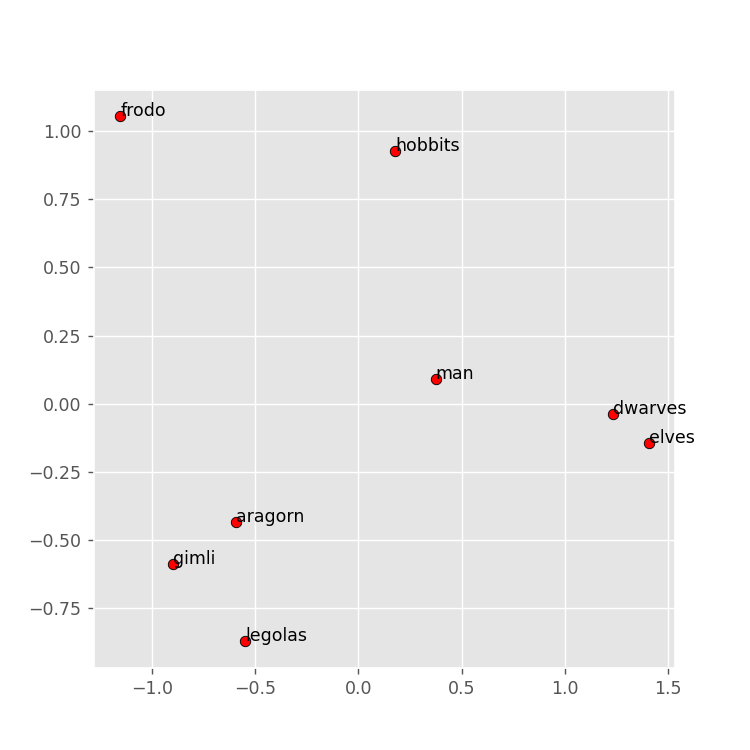

In [89]:
display_pca_scatterplot(model, 
                        ['legolas','gimli','frodo','hobbits','elves','dwarves','aragorn','man'])

Let's have a look at what 'cbow' model will draw for those words

<IPython.core.display.Javascript object>


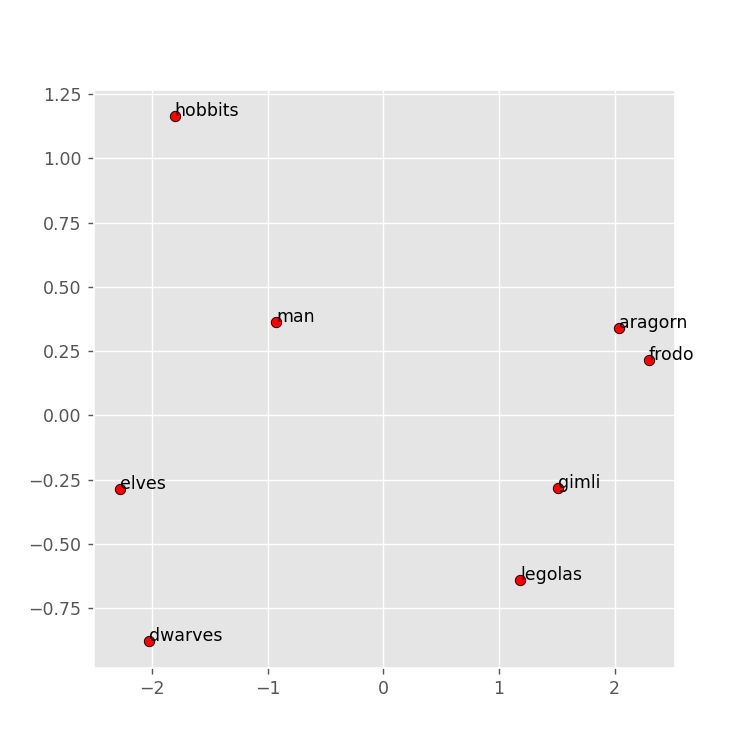

In [91]:
display_pca_scatterplot(model_cbow, 
                        ['legolas','gimli','frodo','hobbits','elves','dwarves','aragorn','man'])

We see that races moved away from each other but the characters got closer. It still makes sense since in the beginning of the book Frodo and Aragorn were together and there is a connection between them. It depends on where you look. 

We created vectors from our words, in other words we turned words into a mathematical expression. Now we can get similar words which share similar context. For example, consider you have word embeddings of ['king','queen','prince','princess']. Based on the vector relationship between the king and the prince, word embeddings allows us to reach the word princess from the word queen.

Firs we define our analogy function. It will take second and third words, add them up and subtract the first word from the new vector. Then we will find the most similar vector to the new one, and that will be our analogy.

In [93]:
def analogy(x1, x2, y1):
    result = model.wv.most_similar(positive=[x2, y1], negative=[x1])
    return result[0][0]

We give gimli, dwarves and legolas to our analogy function and expect it to print elves to the screen.

In [102]:
analogy('gimli','dwarves','legolas')

'elves'

Yes we did it! let's check the weapons they are using. Legolas is using mostly bow and Gimli uses axe. We give bow, legolas and axe to our function and it prints gimli :))

In [106]:
analogy('bow','legolas','axe')

'gimli'

Finally, let's  check the friendship similarities. We know that Legolas and Gimli becomes best friend. Who is the best friend of Frodo?

In [119]:
analogy('legolas','gimli','frodo')

'sam'

Of course it's Sam!